# Tarefa - Álgebra Linear

A célula abaixo gera dados de notas de duas provas, p1 e p2, conforme em aula, mas com mais alunos.

## 1. Reduzindo correlações

a) Já vimos que expressar os dados através da média e diferença é uma transformação linear. Obtenha a média e a diferença através de uma multiplicação matricial, conforme visto em aula.

b) Calcule a correlação entre os dados da **p1** e **p2**

c) Calcule a correlação entre os dados transformados (média e diferença)

d) Comente as correlações observadas.

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Gerando os dados
np.random.seed(123)

p1 = np.random.random(50) *10
p1[p1>10] = 10
p1[p1<0] = 0

p2 = p1 + np.random.normal(0,1,50)
p2[p2>10] = 10
p2[p2<0] = 0

df = pd.DataFrame({'p1': p1, 'p2': p2})

In [31]:
# a) Obtenha a média e a diferença através de uma multiplicação matricial

# Matriz da transformação (média e diferença)
M = np.array([[0.5, 0.5],
              [1, -1]])

# Transformação linear
dados = df[['p1', 'p2']].to_numpy().T
transformados = M @ dados

# Adiciona ao dataframe
df['media'] = transformados[0]
df['diferenca'] = transformados[1]

df.head()

,p1,p2,media,diferenca
0,6.964692,7.943428,7.454060,-0.978736
1,2.861393,5.099537,3.980465,-2.238143
2,2.268515,0.974429,1.621472,1.294085
3,5.513148,4.474359,4.993754,1.038788
4,7.194690,8.938402,8.066546,-1.743712


In [37]:
#b) Calcule a correlação entre p1 e p2

corr_p1_p2 = df['p1'].corr(df['p2'])
print(corr_p1_p2)


0.8957365818728046


In [38]:
#c) Calcule a correlação entre média e diferença
corr_media_dif = df['media'].corr(df['diferenca'])
print(corr_media_dif)



-0.13347385411788837


#### d) Comentário sobre as correlações observadas

A p1 e p2 têm correlação alta. Isso era esperado, porque a p1 varia junto com a p2.

## 2. Soma e diferença

Realize agora uma transformação semelhante, mas que ao invés da média, dê a soma da **p1** e **p2**. Construa o gráfico e conclua que diferenças visuais você observa.

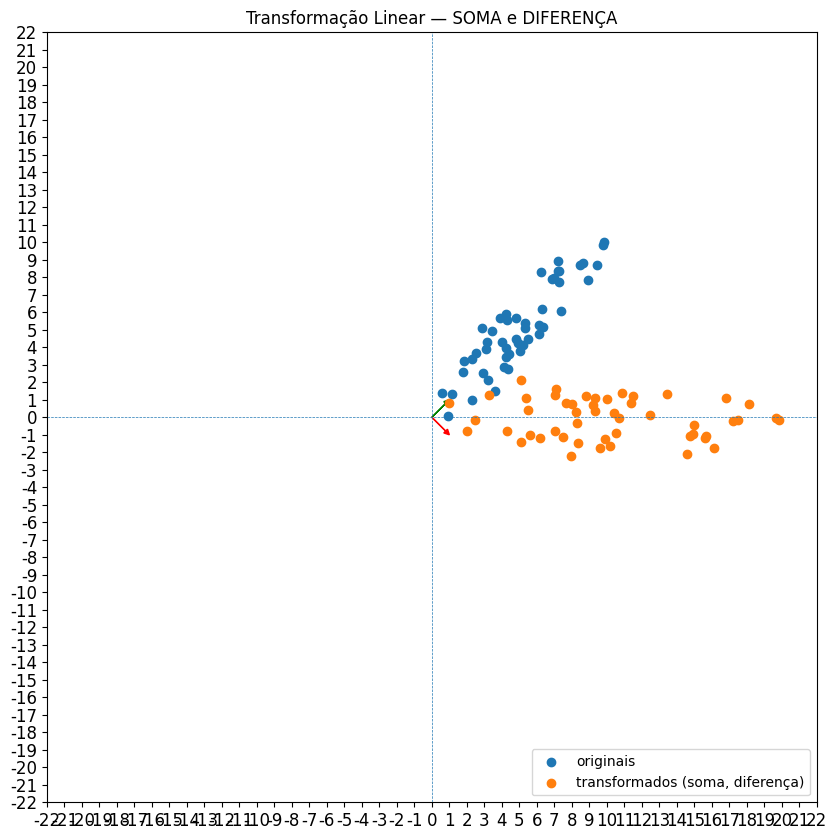

In [34]:
# Matriz de SOMA e DIFERENÇA

m = np.array([[1, 1],
[1, -1]])

# Figura e eixos
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)

xmin = -22
xmax = 22
ymin = -22
ymax = 22

ax.set_aspect('equal', 'box')
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

lista_xticks = list(range(int(xmin), int(xmax)+1))
ax.set_xticks(lista_xticks)
ax.set_xticklabels(lista_xticks, fontsize='large')

lista_yticks = list(range(int(ymin), int(ymax)+1))
ax.set_yticks(lista_yticks)
ax.set_yticklabels(lista_yticks, fontsize='large')

# Vetores coluna (setas)
ax.arrow(0, 0, m[0,0], m[1,0],
head_width=0.3,
head_length=0.3,
fc='g', ec='g',
length_includes_head=True)

ax.arrow(0, 0, m[0,1], m[1,1],
head_width=0.3,
head_length=0.3,
fc='r', ec='r',
length_includes_head=True)

# Linhas de referência
ax.axvline(0, linewidth=.5, linestyle='--')
ax.axhline(0, linewidth=.5, linestyle='--')

# Transformação linear SOMA + DIFERENÇA
df_rot = np.matmul(m, df[['p1', 'p2']].to_numpy().T)

# Plot dados originais
plt.scatter(df['p1'], df['p2'], label='originais')

# Plot dados transformados
plt.scatter(df_rot[0,:], df_rot[1,:], label='transformados (soma, diferença)')

plt.legend(loc='lower right')
plt.title("Transformação Linear — SOMA e DIFERENÇA")
plt.show()

### Construa o gráfico e conclua que diferenças visuais você observa.

Podemos observar que houve uma redistribuição dos dados transformados em relação aos originais. A transformação cria novos eixos que representam conceitos diferentes do original. Por exemplo a diferença captura bem o "desbalanceamento” entre p1 e p2. Além de "esticar" bem os dados no eixo horizontal. Por fim os pontos originais tem correção positiva, já os transformados.